In [1]:
from tqdm import tqdm
import numpy as np
from scipy.stats import binom, beta
from scipy.special import gamma
np.set_printoptions(suppress=True)
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
#import pymc3 as pm

In [2]:
import seaborn as sns
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [2]:
# Parameters
N = 300000 # True total individuals
S = 35  # Sample periods
a = .5
b = .5
#pm.Beta.dist(alpha, beta, shape= N).random()
prop = beta.rvs(a, b, size=N)

In [3]:
prop.sum(), N * (a/(a+b)), a/(a+b), prop.argmax(), prop.max()

(40.26841081277566,
 39.992001599680066,
 0.00019996000799840034,
 105746,
 0.14781011641583625)

84969 0.9999999999968601 0
112151 56823


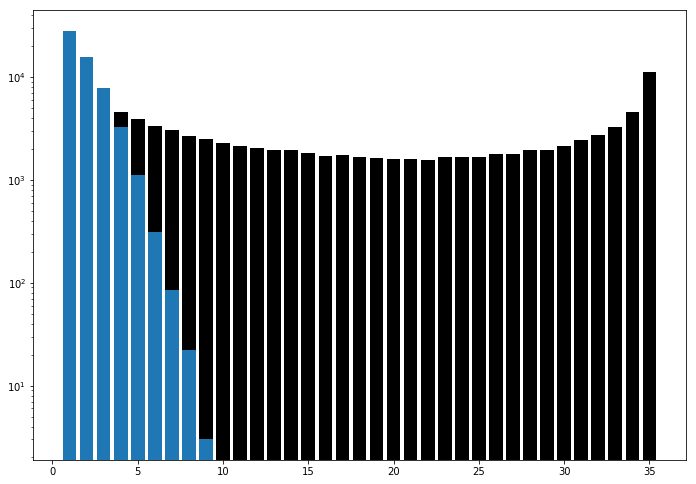

In [87]:
# Parameters
N = 300000 # True total individuals
S = 35  # Sample periods
a = .08
b = .4
#pm.Beta.dist(alpha, beta, shape= N).random()
prop = beta.rvs(a, b, size=N)

obs = []
obslim = []
cnt = 0
for s_ in range(S):
    tmp, = np.where(bernoulli.rvs(prop, size=N))
    #tmp, = np.where(bernoulli.rvs(prop * 3000/prop.sum(), size=N))
    #tmp = np.random.choice(tmp, 3000, replace = False)
    #tmp = np.random.choice(N, 3000, replace = False, p = prop/prop.sum())
    #print(s_, " -> ", len(tmp))
    for i in tmp:
        obs.append(i)
    tmp = np.random.choice(N, 3000, replace = False, p = prop/prop.sum())
    #tmp = np.random.choice(tmp, 3000, replace = False)
    #tmp, = np.where(bernoulli.rvs(prop * 3000/prop.sum(), size=N))
    for i in tmp:
        obslim.append(i)
    if prop.argmax() in tmp:
        cnt += 1
print(prop.argmax(), max(prop), cnt)
print(len(set(obs)), len(set(obslim)))



mydist = Counter(Counter(obs).values())
lists = sorted(mydist.items())
x, y = zip(*lists)

mydistlim = Counter(Counter(obslim).values())
llists = sorted(mydistlim.items())
xl, yl = zip(*llists)

width = 0.35

fig = plt.figure()
ax = fig.add_subplot(111)
#plot
ax.bar(x, y, color = 'black');
ax.bar(xl, yl);
plt.yscale("log")
plt.show()

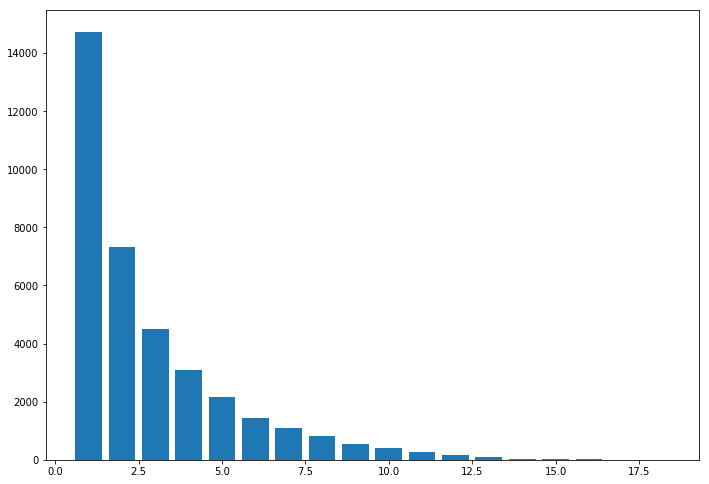

In [40]:
mydist = Counter(Counter(obs).values())
lists = sorted(mydist.items())
x, y = zip(*lists)

mydistlim = Counter(Counter(obslim).values())
llists = sorted(mydistlim.items())
xl, yl = zip(*llists)

width = 0.35

fig = plt.figure()
ax = fig.add_subplot(111)
#plot
ax.bar(xl, yl);
#ax.bar(x, y);
#plt.yscale("log")
plt.show()

In [25]:
xl

(1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35)

In [689]:
len(set(obs))

52949

In [690]:
Counter(obs)[prop.argmax()]

14

In [ ]:
mydist

In [173]:
prop/prop.sum()

array([0.00000506, 0.00000527, 0.0000027 , ..., 0.00000285, 0.00000865,
       0.00000569])

In [144]:
prop.sum()

28650.75177272191

(array([109826.,  35631.,  21528.,  13786.,   8615.,   5332.,   3009.,
          1570.,    605.,     98.]),
 array([0.        , 0.09815767, 0.19631533, 0.294473  , 0.39263066,
        0.49078833, 0.588946  , 0.68710366, 0.78526133, 0.883419  ,
        0.98157666]),
 <a list of 10 Patch objects>)

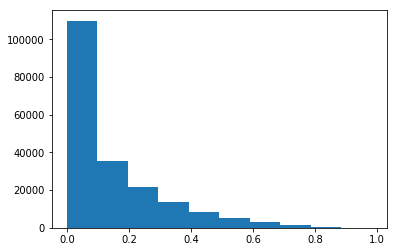

In [145]:
plt.hist(prop)

In [146]:
prop.argmax()

187281

In [147]:
prop[52328]

0.13472467523717876

In [53]:
prop[29850]

0.3177595837330483

In [174]:
npr = prop/prop.sum()

In [150]:
npr

array([0.00001555, 0.0000027 , 0.00001333, ..., 0.00000256, 0.00000379,
       0.00000002])

In [175]:
npr[npr == 0].shape

(0,)

In [152]:
prop.sum()

28650.75177272191

In [77]:
prop

array([0.        , 0.        , 0.00000002, ..., 0.        , 0.        ,
       0.0000047 ])

In [81]:
pm.Beta.dist(0.01, 8).random(size = 3)

array([0., 0., 0.])

In [136]:
beta.rvs(.3, 2, size=30)

array([0.00000331, 0.00000017, 0.07064017, 0.01776926, 0.08935499,
       0.00000001, 0.        , 0.00158692, 0.00000001, 0.        ,
       0.00753238, 0.14804667, 0.0013567 , 0.00279733, 0.06632636,
       0.00003204, 0.00097981, 0.35008213, 0.00004334, 0.        ,
       0.00008245, 0.00539509, 0.06408141, 0.00000283, 0.        ,
       0.00002469, 0.00001676, 0.00001023, 0.        , 0.00051158])

In [92]:
16**0.00001

1.0000277262715884

In [97]:
gamma(0.000001)

999999.4227853243

In [104]:
beta.pdf(1, alpha, beta)

TypeError: '>' not supported between instances of 'beta_gen' and 'int'

In [122]:
a, b = 0.9, 7
beta.pdf(1e-8, 0.0009, 78)

88913.5347167808

In [123]:
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)

In [124]:
x

array([0.00082803, 0.00553432, 0.0102406 , 0.01494689, 0.01965318,
       0.02435947, 0.02906575, 0.03377204, 0.03847833, 0.04318461,
       0.0478909 , 0.05259719, 0.05730348, 0.06200976, 0.06671605,
       0.07142234, 0.07612863, 0.08083491, 0.0855412 , 0.09024749,
       0.09495377, 0.09966006, 0.10436635, 0.10907264, 0.11377892,
       0.11848521, 0.1231915 , 0.12789779, 0.13260407, 0.13731036,
       0.14201665, 0.14672294, 0.15142922, 0.15613551, 0.1608418 ,
       0.16554808, 0.17025437, 0.17496066, 0.17966695, 0.18437323,
       0.18907952, 0.19378581, 0.1984921 , 0.20319838, 0.20790467,
       0.21261096, 0.21731724, 0.22202353, 0.22672982, 0.23143611,
       0.23614239, 0.24084868, 0.24555497, 0.25026126, 0.25496754,
       0.25967383, 0.26438012, 0.2690864 , 0.27379269, 0.27849898,
       0.28320527, 0.28791155, 0.29261784, 0.29732413, 0.30203042,
       0.3067367 , 0.31144299, 0.31614928, 0.32085556, 0.32556185,
       0.33026814, 0.33497443, 0.33968071, 0.344387  , 0.34909

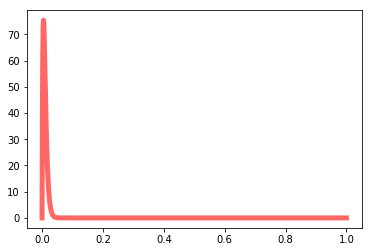

In [220]:
xx = np.linspace(0, 1, 100000)
fig, ax = plt.subplots(1, 1)
a, b = 1.96, 200
ax.plot(xx, beta.pdf(xx, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')

In [154]:
prop[prop == 0]

array([], dtype=float64)

In [191]:
obs2 = []
for _ in range(S):
    for i in list(np.random.choice(N, 3000, replace = False)):
        obs2.append(i)

In [193]:
len(set(obs2))

28107

In [188]:
np.random.choice(10, 2, replace = False)

array([0, 7])

In [194]:
3000*10

30000

In [201]:
prop

array([0.        , 0.        , 0.        , ..., 0.        , 0.00000004,
       0.00186392])

In [260]:
nrp = prop/prop.sum()

In [263]:
nrp[87]

0.024904122067625444

In [287]:
cnt = 1
for _ in range(S):
    if 87 in np.random.choice(N, 10, replace = False, p=nrp):
        cnt += 1
print(cnt)

2388


<BarContainer object of 100 artists>

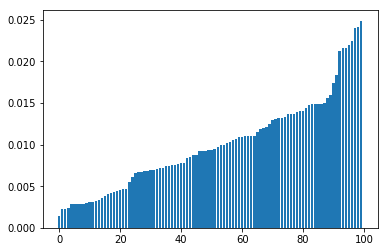

In [276]:
plt.bar(np.arange(len(nrp)), sorted(nrp))

In [277]:
np.random.choice(N, 10, replace = False, p=

SyntaxError: unexpected EOF while parsing (<ipython-input-277-4cc5be5f466a>, line 1)

In [301]:
z = []

In [302]:
ar = np.array([565, 73,563,35,35,35])

In [306]:
"".join(z, list(ar))

TypeError: join() takes exactly one argument (2 given)

In [218]:
test = beta.rvs(a, b, size=N)

In [220]:
test.sum()

27592.19013369081

In [222]:
N * a/(a+b)

27586.206896551725

In [358]:
np.random.choice(5, 1, replace = False, p = [.03, .05, .9, 0.01, 0.01])

array([2])

In [1124]:
scaledprop = (prop - prop.min()) / (prop - prop.min()).sum()

In [1133]:
np.array(sorted(scaledprop)).min()

0.0

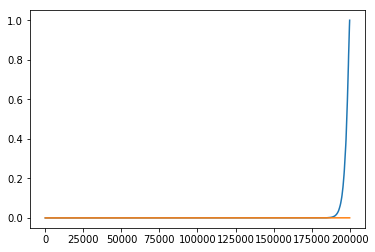

In [74]:
zp = prop/prop.sum()
plt.plot(sorted(prop))
plt.plot()
plt.plot(sorted(zp))

In [72]:
prop = beta.rvs(.01, .8, size = N)
prop[prop > .5].shape

(1866,)

In [193]:
test_p = np.random.choice(N, N-1, replace = False, p = prop/prop.sum())

ValueError: Fewer non-zero entries in p than size

In [184]:
sum(prop[test_p]/prop.sum())

0.9999999999999547

In [168]:
test_p

array([  3892,  20326, 173413, ..., 183908, 148560,  83954])

In [189]:
(prop[test_p]/prop.sum())[:100000].sum()

1.0

In [198]:
prop[prop == 0.].shape

(4757,)

In [199]:
p_p = prop/prop.sum()

In [201]:
p_p[p_p == 0].shape

(4896,)

(array([  2.,   6.,  35.,  78., 155., 248., 226., 172.,  63.,  15.]),
 array([15847.27986929, 15847.28821723, 15847.29656516, 15847.30491309,
        15847.31326102, 15847.32160896, 15847.32995689, 15847.33830482,
        15847.34665275, 15847.35500069, 15847.36334862]),
 <a list of 10 Patch objects>)

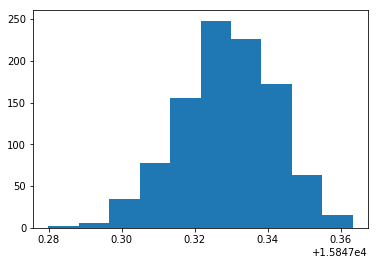

In [317]:
N = 100000
prop = beta.rvs(1.5, 8, size = N)
su = []
for _ in range(1000):
    tmp = np.random.choice(prop, 99900, replace = False, p = prop/ prop.sum()).sum()
    su.append(tmp.sum())

plt.hist(su)

(array([  2.,   6.,  29., 145., 266., 286., 172.,  77.,  14.,   3.]),
 array([10314.61086627, 10324.68966735, 10334.76846843, 10344.84726952,
        10354.9260706 , 10365.00487168, 10375.08367276, 10385.16247384,
        10395.24127492, 10405.320076  , 10415.39887709]),
 <a list of 10 Patch objects>)

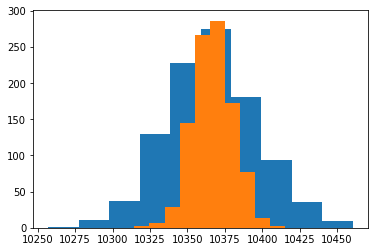

In [315]:
N = 65650
su2 = []
for _ in range(1000):
    tmp = beta.rvs(1.5, 8, size = N)
    su2.append(tmp.sum())
plt.hist(su2)
plt.hist(su)

In [224]:
3000 * (.01/ (.01 + .8))

37.03703703703704

In [248]:
l = np.array([.8, .9, .10, .001, 0.9913])
np.random.choice(l, 2, replace = False, p = l/ l.sum())

array([0.9913, 0.9   ])

In [254]:
(prop * 3000/prop.sum()).sum()

2999.9999999999986

In [238]:
l.sum()

2.7923

In [263]:
prop.max()

0.823798361823106

In [281]:
prop.sum()

31578.049269681065

In [288]:
(1.5 / (1.5 + 8)) * 3000

473.6842105263158

In [ ]:
prop[prop == 0]

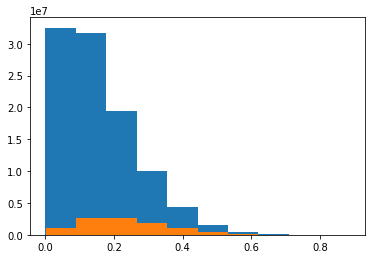

In [18]:
N = 100000
su = []
sf = []
propfix = beta.rvs(1.5, 8, size = N)
for _ in range(1000):
    prop = beta.rvs(1.5, 8, size = N)
    for z in prop:
        sf.append(z)
    tmp = np.random.choice(prop, 10000, replace = False, p = prop/ prop.sum())
    for i in tmp:
        su.append(i)
        
plt.hist(np.array(sf));
plt.hist(np.array(su));

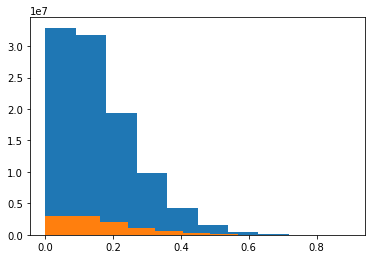

In [17]:
#bist = sorted(Counter(su).items())
#xb, yb = zip(*bist)
plt.hist(np.array(sf));
plt.hist(np.array(su));

In [2]:
import seaborn as sns
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

N = 100000
su0 = []
su1k = []
su2k = []
su10k = []
su20k = []
su30k = []
su40k = []
su50k = []
su60k = []
su70k = []
su80k = []

propfix = beta.rvs(.5, 8, size = N)

for _ in range(10000):
    tmp = np.random.choice(propfix, 100, replace = False, p = propfix/ propfix.sum())
    for i in tmp:
        su0.append(i)
        
for _ in range(1000):
    tmp = np.random.choice(propfix, 1000, replace = False, p = propfix/ propfix.sum())
    for i in tmp:
        su1k.append(i)

for _ in range(1000):
    tmp = np.random.choice(propfix, 2000, replace = False, p = propfix/ propfix.sum())
    for i in tmp:
        su2k.append(i)
        
for _ in range(100):
    tmp = np.random.choice(propfix, 10000, replace = False, p = propfix/ propfix.sum())
    for i in tmp:
        su10k.append(i)
for _ in range(100):
    tmp = np.random.choice(propfix, 20000, replace = False, p = propfix/ propfix.sum())
    for i in tmp:
        su20k.append(i)
for _ in range(100):
    tmp = np.random.choice(propfix, 30000, replace = False, p = propfix/ propfix.sum())
    for i in tmp:
        su30k.append(i)
for _ in range(100):
    tmp = np.random.choice(propfix, 40000, replace = False, p = propfix/ propfix.sum())
    for i in tmp:
        su40k.append(i)
for _ in range(100):
    tmp = np.random.choice(propfix, 50000, replace = False, p = propfix/ propfix.sum())
    for i in tmp:
        su50k.append(i)
for _ in range(100):
    tmp = np.random.choice(propfix, 60000, replace = False, p = propfix/ propfix.sum())
    for i in tmp:
        su60k.append(i)   
for _ in range(100):
    tmp = np.random.choice(propfix, 70000, replace = False, p = propfix/ propfix.sum())
    for i in tmp:
        su70k.append(i)   
for _ in range(10):
    tmp = np.random.choice(propfix, 80000, replace = False, p = propfix/ propfix.sum())
    for i in tmp:
        su80k.append(i)
        
su0 = np.array(su0)
su1k = np.array(su1k)
su2k = np.array(su2k)
su10k = np.array(su10k)
su20k = np.array(su20k)
su30k = np.array(su30k)
su40k = np.array(su40k)
su50k = np.array(su50k)
su60k = np.array(su60k)
su70k = np.array(su70k)
su80k = np.array(su80k)

In [92]:
N = 200000
propfix = beta.rvs(0.0001, 14.579, size = N)
stmp = []
for _ in range(3000):
    tmp = np.random.choice(propfix, 3000, replace = False, p = propfix/ propfix.sum())
    for i in tmp:
        stmp.append(i)
stmp = np.array(stmp)

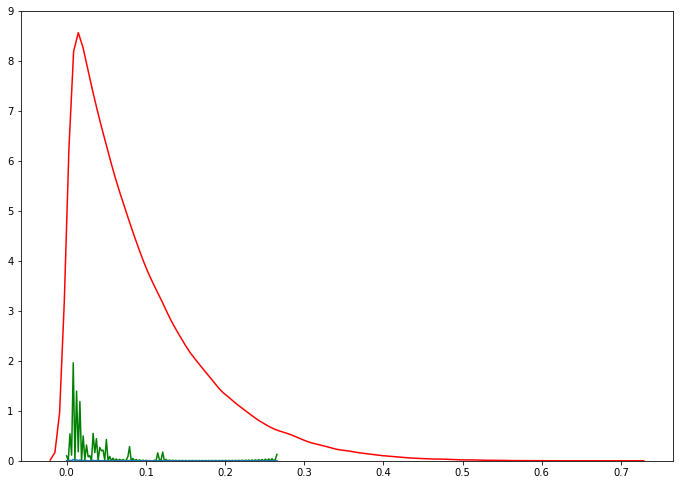

In [90]:
sns.distplot(beta.rvs(1.00001, 10, size = N), color= 'red', hist = False);
sns.distplot(stmp,hist=False, color = 'green');
sns.distplot(propfix,hist=False);

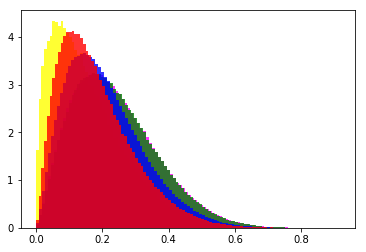

In [92]:
N = 100000
su0 = []
su1 = []
su2 = []
su3 = []
for _ in range(10000):
    propnew = beta.rvs(1.5, 8, size = N)
    tmp = np.random.choice(propnew, 100, replace = False, p = propnew/ propnew.sum())
    for i in tmp:
        su0.append(i)
for _ in range(1000):
    propnew = beta.rvs(1.5, 8, size = N)
    tmp = np.random.choice(propnew, 1000, replace = False, p = propnew/ propnew.sum())
    for i in tmp:
        su1.append(i)
for _ in range(100):
    propnew = beta.rvs(1.5, 8, size = N)
    tmp = np.random.choice(propnew, 50000, replace = False, p = propnew/ propnew.sum())
    for i in tmp:
        su2.append(i)
for _ in range(10):
    propnew = beta.rvs(1.5, 8, size = N)
    tmp = np.random.choice(propnew, 80000, replace = False, p = propnew/ propnew.sum())
    for i in tmp:
        su3.append(i)
su0 = np.array(su0)
su1 = np.array(su1)
su2 = np.array(su2)
su3 = np.array(su3)
plt.hist(propfix, bins = 100, alpha = .8, density = True, color = 'yellow');
plt.hist(su0, bins = 100, alpha = .8, density = True, color = 'magenta');
plt.hist(su1, bins = 100, alpha = .8, density = True, color = 'green');
plt.hist(su2, bins = 100, alpha = .8, density = True, color = 'blue');
plt.hist(su3, bins = 100, alpha = .8, density = True, color = 'red');

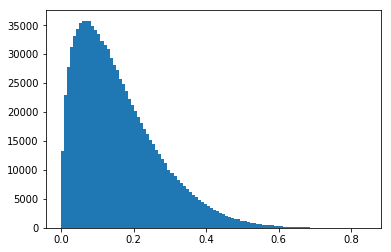

In [28]:
plt.hist(beta.rvs(1.5, 8, size = 1000000), bins = 100);

In [59]:
with pm.Model() as model:
    a = pm.Uniform('alpha', 0, 5)
    b = pm.Uniform('beta', 0, 20)
    U = pm.Beta('Unseen', alpha = a, beta = b, observed = np.random.choice(stmp, 100000,replace = False))
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:12<00:00, 493.55draws/s]
The acceptance probability does not match the target. It is 0.8891542713935173, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8983372569033486, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8980185833705155, but should be close to 0.8. Try to increase the number of tuning steps.


/Users/ded/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/ded/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c364388d0>,
      dtype=object)

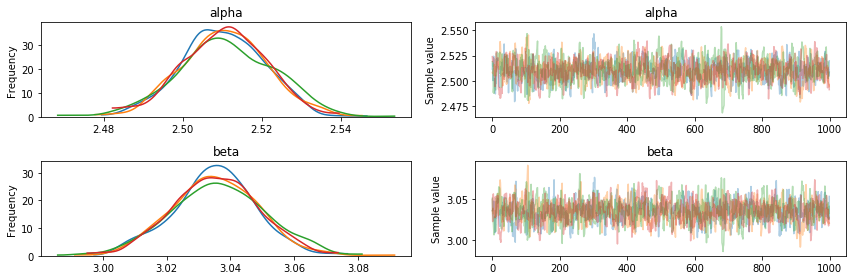

In [60]:
pm.traceplot(trace)

In [61]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,2.510468,0.011096,0.000310,2.488952,2.532245,1083.794635,1.000020
beta,3.035254,0.013654,0.000398,3.008520,3.061933,1033.872949,1.000174
